In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [3]:
# Import the data
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
data = pd.read_csv(url, names=columns)
# Droping unnessessary columns
data = data.drop(0).reset_index(drop=True) 
data = data.drop(['Ticket', 'Name', 'Cabin'], axis=1) #these columns are not defining the result
# Clasificate the data
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
#Checking the result
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.25,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.925,2
3,4,1,1,0,35,1,0,53.1,2
4,5,0,3,1,35,0,0,8.05,2


In [4]:
# Esolate the target(Survivded) data
x = data.drop("Survived", axis=1) 
# Removing Nuns
x.fillna(0, inplace=True)
y = pd.Series(data["Survived"]).astype(int) # Target data
x.head(), y.head()

(  PassengerId Pclass  Sex Age SibSp Parch     Fare  Embarked
 0           1      3    1  22     1     0     7.25         2
 1           2      1    0  38     1     0  71.2833         0
 2           3      3    0  26     0     0    7.925         2
 3           4      1    0  35     1     0     53.1         2
 4           5      3    1  35     0     0     8.05         2,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int32)

In [5]:
# Deviding the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42, shuffle = True )
# training data with Linear Regression
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train) # fitting the model to data
y_pred = model.predict(x_test) # doing predict
mse = mean_squared_error(y_test, y_pred) # estimating mse
coefficients = model.coef_
print("Mean Squared Error:", mse) # showing mse
print(f"coefs: {coefficients}") # showing coeficents of log regression
print(f"r2 score: {r2_score(y_test,y_pred)}") #showing r2 score

Mean Squared Error: 0.21076233183856502
coefs: [[ 3.58631846e-04 -7.86303482e-01 -2.60917903e+00 -9.15118796e-03
  -2.43271768e-01 -9.28192030e-02  3.95725352e-03 -2.38156154e-01]]
r2 score: 0.12116384370283373


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
len(data)

891

In [7]:
#Checking accuracy
acc_log = accuracy_score(y_test,y_pred)
acc_log


0.7892376681614349

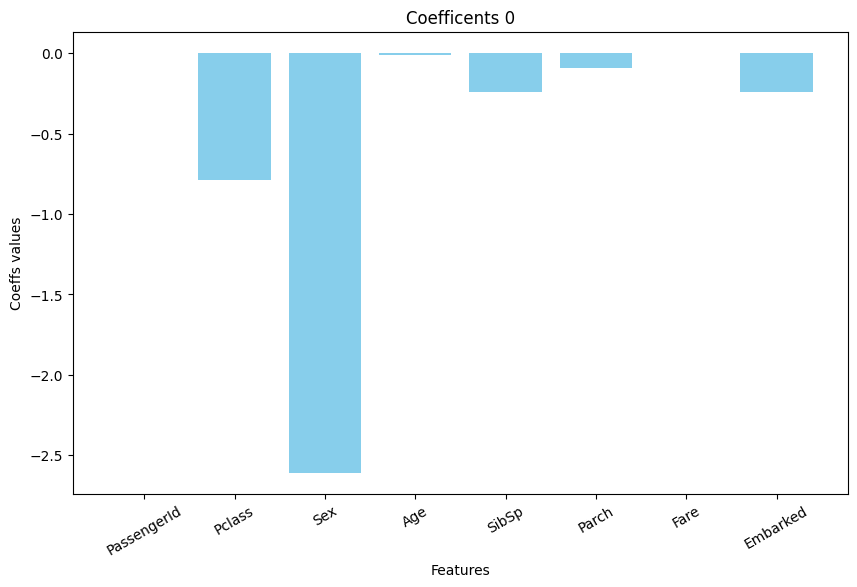

In [8]:
# Coefficents vizualization to see each features impact
newcol = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
for i in range(len(coefficients)):
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(x.shape[1]), coefficients[i], color='skyblue')
    plt.xticks(np.arange(x.shape[1]), newcol, rotation=30)
    plt.title(f'Coefficents {i}')
    plt.xlabel('Features')
    plt.ylabel('Coeffs values')
    plt.show()


Vizualizating ROC curve 

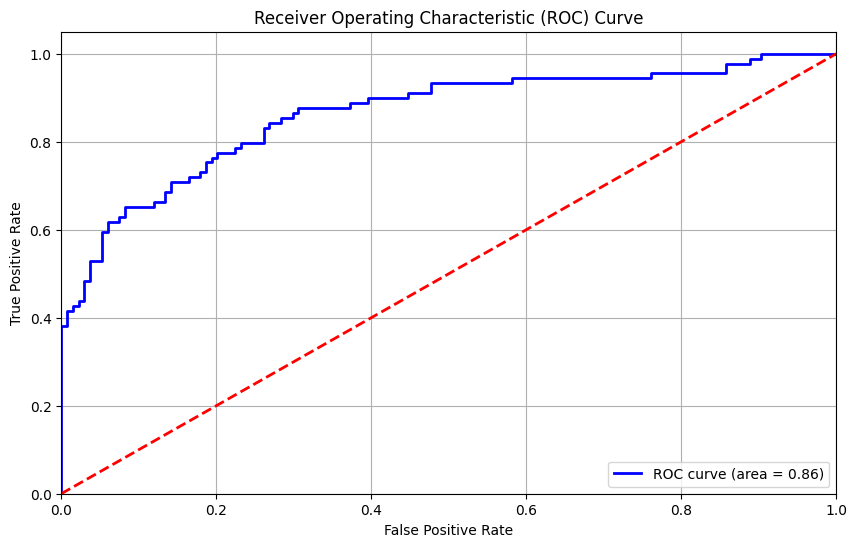

In [9]:
from sklearn.metrics import accuracy_score, roc_curve, auc
y_probs = model.predict_proba(x_test)[:, 1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

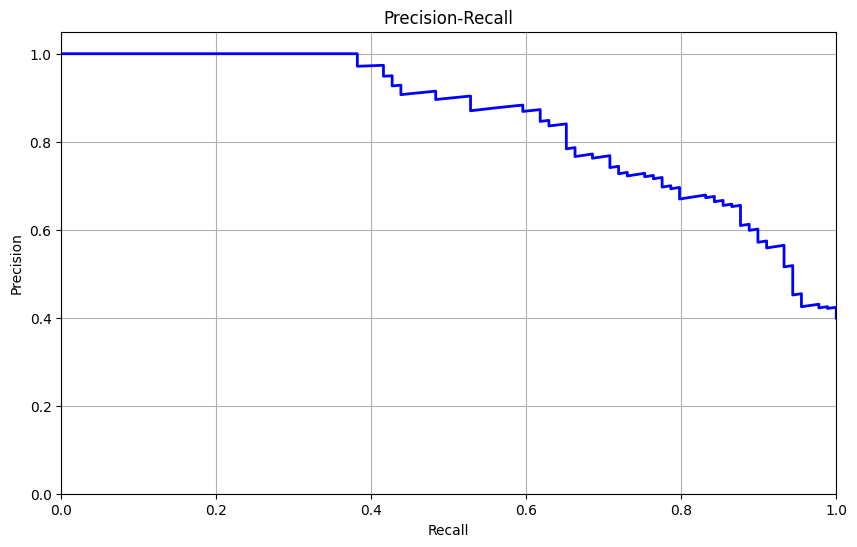

In [10]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
# vizualisation Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

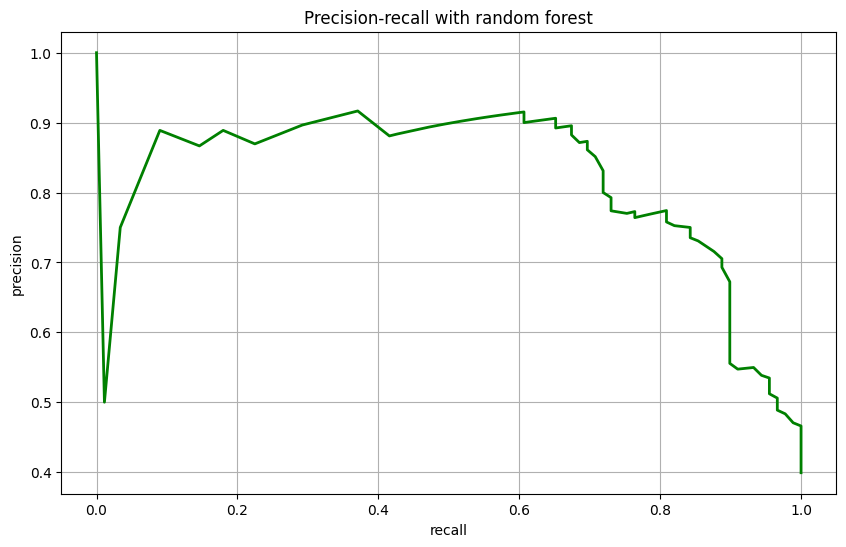

In [11]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# making predicts
y_probs = model.predict_proba(x_test)[:, 1]
# Calculate Precision и Recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Vizualizating Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-recall with random forest')

plt.grid(True)
plt.show()

In [12]:
#Accuaracy with random forest
acc_for = accuracy_score(y_test,y_pred)
acc_for

0.7892376681614349

In [13]:
# Let's add cross validation to escape possible overfitting
cv_scores = cross_val_score(model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))
model.fit(x_train, y_train)


Cross-Validation Scores: [0.70949721 0.80898876 0.8258427  0.81460674 0.81460674]
Average Cross-Validation Score: 0.7947084301048271


RandomForestClassifier(random_state=42)

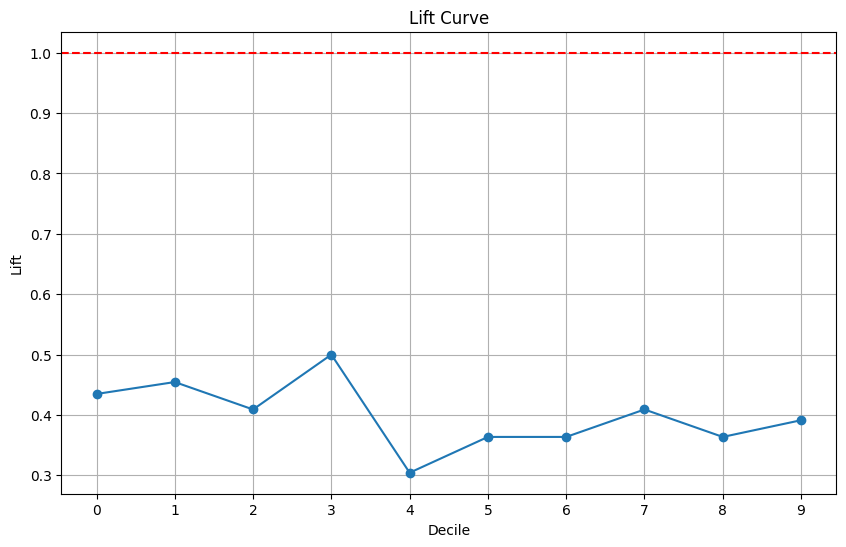

In [14]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Create a DataFrame to hold true labels and predicted probabilities
results = pd.DataFrame({'y_true': y_test, 'y_pred_proba': y_pred_proba})

# Sort the results by predicted probabilities
results.sort_values(by='y_pred_proba', ascending=False, inplace=True)

# Calculate lift
results['decile'] = pd.qcut(results.index, 10, labels=False)  # Create deciles
lift_data = results.groupby('decile').agg({'y_true': 'sum', 'y_pred_proba': 'count'}).reset_index()
lift_data['lift'] = lift_data['y_true'] / lift_data['y_pred_proba']  # Calculate lift

# Plot Lift Curve
plt.figure(figsize=(10, 6))
plt.plot(lift_data['decile'], lift_data['lift'], marker='o')
plt.title('Lift Curve')
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.axhline(1, color='red', linestyle='--')  # Random model baseline
plt.xticks(lift_data['decile'])
plt.grid()
plt.show()


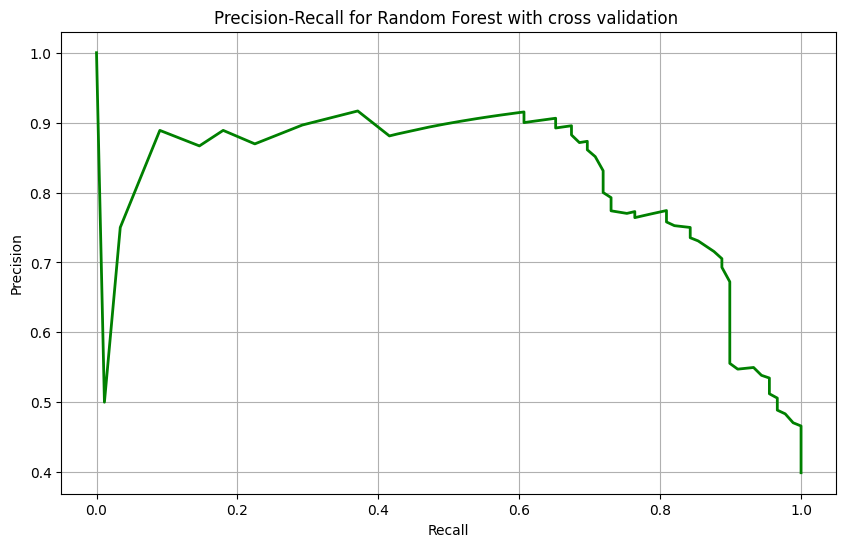

In [15]:

precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Create Precision-Recall line
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for Random Forest with cross validation ')
plt.grid(True)
plt.show()

Creating Neural Networks 

In [16]:
# Adding nessecarrt librarys 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score


In [17]:
# Converting the data to float32 so we can work with tensorflow
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [18]:
model = Sequential()

#Input layer
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))  # 32 neurons in the first layer
#Hiden layers
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))  # Regularization to prevent overfitting

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
#Output layer (since it's binary classification, we use sigmoid activation)
model.add(Dense(1, activation='sigmoid'))
#Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
#Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

#       Evaluate the model
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5586 - loss: 15.0887 - val_accuracy: 0.5373 - val_loss: 2.1851
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5335 - loss: 9.0129 - val_accuracy: 0.6269 - val_loss: 1.8143
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5393 - loss: 4.6783 - val_accuracy: 0.6269 - val_loss: 1.3846
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5492 - loss: 3.4348 - val_accuracy: 0.6493 - val_loss: 1.2435
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5294 - loss: 2.1152 - val_accuracy: 0.6567 - val_loss: 1.1759
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5813 - loss: 1.4479 - val_accuracy: 0.6269 - val_loss: 0.9796
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5857 - loss: 0.7874 - val_accuracy: 0.6343 - val_loss: 0.9238
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6028 - loss: 0.7124 - val_accuracy: 0.6194 -

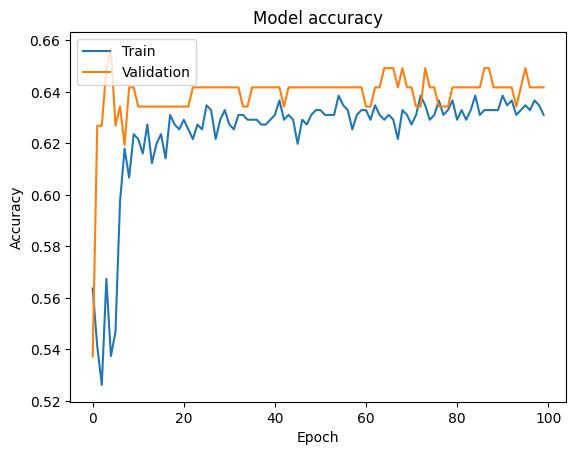

In [19]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

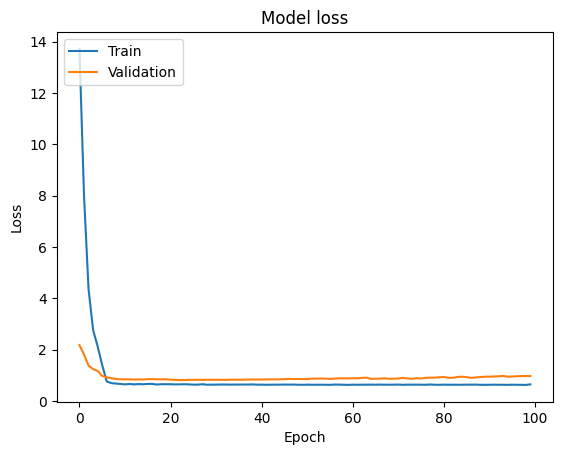

In [20]:
# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()